<a href="https://colab.research.google.com/github/vlanjewar213/sentiment-analysis/blob/main/sentiment_analysis_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai

Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
     |████████████████████████████████| 704.8 MB 4.4 kB/s 


In [13]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [14]:
train  = pd.read_csv('/content/sample_data/train_2kmZucJ.csv')
#/content/sample_data/train_2kmZucJ.csv
test= pd.read_csv('/content/sample_data/test_oJQbWVk.csv')

In [15]:
print(train.head())

   id  label                                              tweet
0   1      0  #fingerprint #Pregnancy Test https://goo.gl/h1...
1   2      0  Finally a transparant silicon case ^^ Thanks t...
2   3      0  We love this! Would you go? #talk #makememorie...
3   4      0  I'm wired I know I'm George I was made that wa...
4   5      1  What amazing service! Apple won't even talk to...


In [16]:
combi = train.append(test, ignore_index=True)

In [5]:

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 
    
print('\n\nRemoving  Twitter Handles \n\n')



Removing  Twitter Handles 




In [17]:
# remove twitter handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")


Removing Punctuations, Numbers, and Special Characters

In [18]:
# remove special characters, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


Removing Short Words

In [19]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

Let’s take another look at the first few rows of the combined dataframe.

In [20]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test https MfQV #andro...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally transparant silicon case Thanks uncle ...
2,3,0.0,We love this! Would you go? #talk #makememorie...,love this Would #talk #makememories #unplug #r...
3,4,0.0,I'm wired I know I'm George I was made that wa...,wired know George made that #iphone #cute #dav...
4,5,1.0,What amazing service! Apple won't even talk to...,What amazing service Apple even talk about que...


Tokenization

In [21]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [#fingerprint, #Pregnancy, Test, https, MfQV, ...
1    [Finally, transparant, silicon, case, Thanks, ...
2    [love, this, Would, #talk, #makememories, #unp...
3    [wired, know, George, made, that, #iphone, #cu...
4    [What, amazing, service, Apple, even, talk, ab...
Name: tidy_tweet, dtype: object

Stemming

In [22]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [#fingerprint, #pregnanc, test, http, mfqv, #a...
1    [final, transpar, silicon, case, thank, uncl, ...
2    [love, thi, would, #talk, #makememori, #unplug...
3    [wire, know, georg, made, that, #iphon, #cute,...
4    [what, amaz, servic, appl, even, talk, about, ...
Name: tidy_tweet, dtype: object

Now let’s stitch these tokens back together.

In [23]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet

In [6]:
train['tidy_tweet'] = np.vectorize(remove_pattern)(train['tweet'], "@[\w]*")

print(train['tidy_tweet'].head())

print('\n\nRemoving Short Words\n\n')

train['tidy_tweet'] = train['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

print(train['tidy_tweet'].head())


print('\n\nTweet Tokenization\n\n')

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tidy_tweet, dtype: object


Removing Short Words


0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally transparant silicon case Thanks uncle ...
2    love this! Would #talk #makememories #unplug #...
3    wired know George made that #iphone #cute #dav...
4    What amazing service! Apple won't even talk ab...
Name: tidy_tweet, dtype: object


Tweet Tokenization




In [7]:
tokenized_tweet = train['tidy_tweet'].apply(lambda x: x.split())
print(tokenized_tweet.head())


0    [#fingerprint, #Pregnancy, Test, https://goo.g...
1    [Finally, transparant, silicon, case, Thanks, ...
2    [love, this!, Would, #talk, #makememories, #un...
3    [wired, know, George, made, that, #iphone, #cu...
4    [What, amazing, service!, Apple, won't, even, ...
Name: tidy_tweet, dtype: object


In [24]:
print('\n\nStemming\n\n')

stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
 # stemming
print(tokenized_tweet.head())




Stemming


0    [#, f, i, n, g, e, r, p, r, i, n, t,  , #, p, ...
1    [f, i, n, a, l,  , t, r, a, n, s, p, a, r,  , ...
2    [l, o, v, e,  , t, h, i,  , w, o, u, l, d,  , ...
3    [w, i, r, e,  , k, n, o, w,  , g, e, o, r, g, ...
4    [w, h, a, t,  , a, m, a, z,  , s, e, r, v, i, ...
Name: tidy_tweet, dtype: object


Let’s visualize all the words our data using the wordcloud plot.

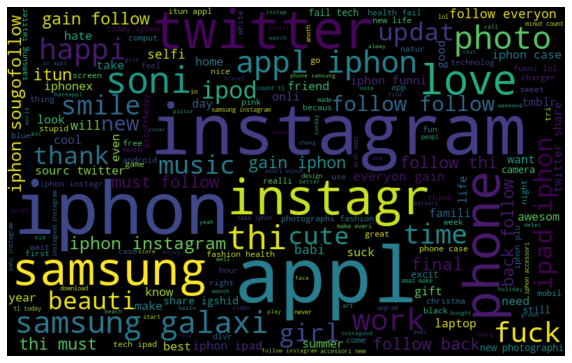

In [25]:
import matplotlib
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
